# More analysis!

Open up `merged.csv` with `read_csv`. Use `parse_dates=['sale_datetime']` so automatically read in that column as a datetime. You'll also want to clean up the column names.

In [39]:
import pandas as pd
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
df=pd.read_csv("merged.csv")

In [40]:
df.head()
parse_dates=['sale_datetime']
df.dtypes

borough                             int64
neighborhood                       object
building_class_category            object
tax_class_at_present               object
block                               int64
lot                                 int64
ease-ment                         float64
building_class_at_present          object
address                            object
apartment_number                   object
zip_code                          float64
residential_units                 float64
commercial_units                  float64
total_units                       float64
land_square_feet                  float64
gross_square_feet                 float64
year_built                        float64
tax_class_at_time_of_sale           int64
building_class_at_time_of_sale     object
sale_price                          int64
sale_date                          object
month                              object
year_month                         object
dtype: object

In [41]:
df['sale_date'] = pd.to_datetime(df.sale_date)
df.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
ease-ment                                float64
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                 float64
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                               float64
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                 int64
sale_date           

In [42]:
df.head(2)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,month,year_month
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,11228.0,1.0,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31,August,07-08
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,11214.0,1.0,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22,May,07-05


## Using our newfound knowledge

Now we know that there are all sorts of weird things in the dataset - $0 sales, parking lots, etc etc.

**Show me the average price of a single-family home over time.** Median prices over every month or quarterly or something like that. Don't include anything that sold for $0!

* **Tip:** `.str.startswith` will let you pick sales with a building code that *starts with* `A`, the single-family-home code.

<AxesSubplot: xlabel='sale_date'>

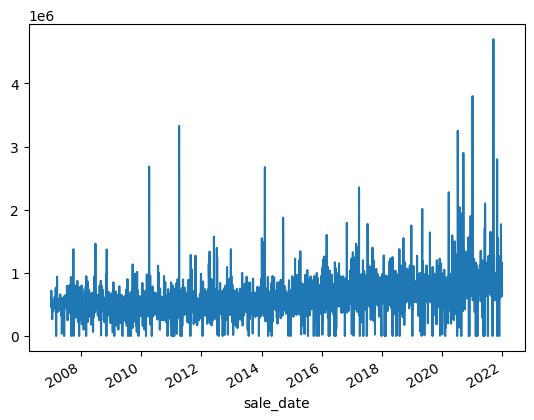

In [43]:
single_family_home_price_df = df[(df.building_class_at_time_of_sale.str.startswith('A')) & (df.sale_price > 0)]

single_family_home_price_df.groupby('sale_date').sale_price.median().plot()

<AxesSubplot: xlabel='sale_date'>

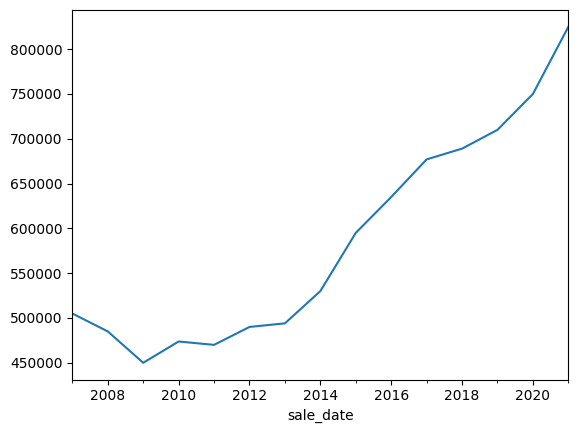

In [44]:
single_family_home_price_df.resample('Y', on='sale_date').sale_price.median().plot()

What has happened since 2013 or so should look a *little terrifying*.

For a litle extra spice please refer to [this piece about asking New York mayoral candidates what the average home price is in Brooklyn](https://www.nytimes.com/2021/05/11/nyregion/median-home-brooklyn-mayor.html).

# Okay, your move

No, you probably don't know anything about New York home prices. Or parking lot prices. Or say, whether mixed use homes with families living above stores should be expected to be sold more or less frequently than purely retail buildings.

But I'm a horrible, mean boss, and I'm telling you: **do a little analysis and pitch me two things that might be interesting to research in this dataset.** I'm not actually going to make you pursue any of this, but I'd like to see how creative you can be.

The lowest-hanging fruit involves putting things into groups and comparing them. Put sales into groups based on neighborhoods,  compare sale prices. Compare pre-COVID to during-COVID and frequency of sales. Etc etc etc. Spend time [reading through the list of building classifications](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html).

Narrowing down also helps. Cut the data into just being the few types of theaters, or the single-family homes we looked at before. How about the $0 sales? What about locations that had their building class change between the time of sale and the current day, e.g. are all kinds of warehouses being rezoned as residential?

**Down below I expect to see a good amount of filtering, groupby, maybe some resampling, and whatever other types of poking around one might do.** You don't pitch based on a feeling in your heart, you pitch based on what the data looks like plus a few lines of code that built out exploratory analysis, and then you do the real research and interviews later on.

Do a little drilling into the data and try to find some potential leads.

In [50]:
df.sample(5)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,month,year_month
337487,3,BOROUGH PARK,29 COMMERCIAL GARAGES,4,5404,40,NaN,G7,678 DAHILL ROAD,NaN,11218.0,0.0,0.0,0.0,1900.0,0.0,0.0,4,G7,910000,2016-03-30,March,16-03
294563,3,BENSONHURST,02 TWO FAMILY HOMES,1,6258,47,NaN,B1,1571 79TH STREET,NaN,11228.0,2.0,0.0,2.0,2800.0,1872.0,1920.0,1,B1,905000,2010-06-25,June,10-06
207648,3,CANARSIE,03 THREE FAMILY HOMES,1,8005,158,NaN,C0,754 EAST 85TH STREET,NaN,11236.0,3.0,0.0,3.0,2200.0,2753.0,1965.0,1,C0,680000,2008-01-14,January,08-01
207834,3,CARROLL GARDENS,07 RENTALS - WALKUP APARTMENTS,2B,351,14,NaN,C1,242 PRESIDENT STREET,8,11231.0,8.0,0.0,8.0,2500.0,6584.0,1920.0,2,C1,0,2008-09-11,September,08-09
132492,3,BRIGHTON BEACH,07 RENTALS - WALKUP APARTMENTS,2,8678,73,NaN,C7,3160 CONEY ISLAND AVENUE,NaN,11235.0,15.0,1.0,16.0,3720.0,12160.0,1938.0,2,C7,3785000,2018-01-29,January,18-01


In [106]:
#Ranking neighborhoods by the largest rise in single-family home prices between Sep 2012 and Sep 2022
#df[df.colname.isin(['option1', 'option2', 'option3'])]

single_family_home_neighborhood_df = df[df.building_class_at_time_of_sale.str.startswith('A')]

single_family_home_neighborhood_df = single_family_home_neighborhood_df[single_family_home_neighborhood_df['sale_price'] >= 1000]
single_family_home_neighborhood_df = single_family_home_neighborhood_df.reset_index(drop=True)
single_family_home_neighborhood_df = single_family_home_neighborhood_df.groupby('neighborhood').resample('Y', on='sale_date').sale_price.median().unstack().T.reset_index()
single_family_home_neighborhood_df.columns = single_family_home_neighborhood_df.columns.str.lower().str.replace(" ", "_")
single_family_home_neighborhood_df.dtypes

neighborhood
sale_date             datetime64[ns]
bath_beach                   float64
bay_ridge                    float64
bedford_stuyvesant           float64
bensonhurst                  float64
                           ...      
williamsburg-east            float64
williamsburg-north           float64
williamsburg-south           float64
windsor_terrace              float64
wyckoff_heights              float64
Length: 62, dtype: object

<AxesSubplot: xlabel='sale_date'>

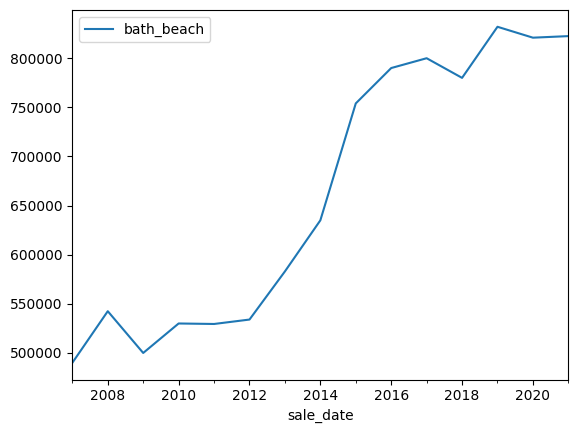

In [105]:
single_family_home_neighborhood_df.sample(10)
single_family_home_neighborhood_df.plot(x='sale_date',y='bath_beach')
#and do this for every single neighborhood, and calculate the difference

<AxesSubplot: xlabel='sale_date'>

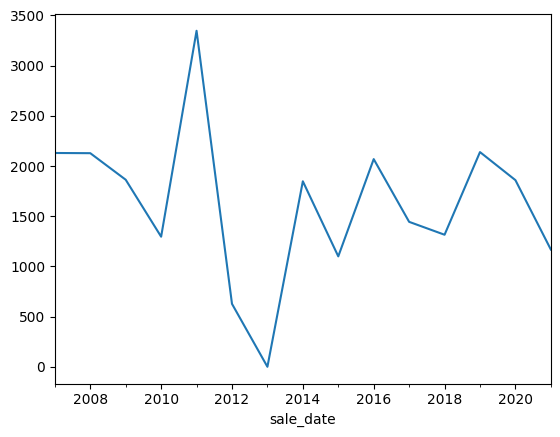

In [115]:
#Have the size of single-family homes being bought shrunk over the years? By what percentage?

single_family_home_neighborhood_df = df[df.building_class_at_time_of_sale.str.startswith('A')]
single_family_home_neighborhood_same_df = single_family_home_neighborhood_df[single_family_home_neighborhood_df.building_class_at_time_of_sale != single_family_home_neighborhood_df.building_class_at_present]
single_family_home_neighborhood_same_df.head()
single_family_home_neighborhood_same_df.resample('Y', on='sale_date').gross_square_feet.median().plot()

#I guess so; 2013 had missing data. 

In [119]:
single_family_home_neighborhood_same_df.resample('Y', on='sale_date').gross_square_feet.median()

#2130-1168=962
#962%2130=0.45
#Homes are now 45% smaller than 2007. That's slightly less than half?

sale_date
2007-12-31    2130.0
2008-12-31    2128.0
2009-12-31    1863.5
2010-12-31    1296.0
2011-12-31    3347.5
2012-12-31     627.0
2013-12-31       0.0
2014-12-31    1848.0
2015-12-31    1100.0
2016-12-31    2069.0
2017-12-31    1444.0
2018-12-31    1315.5
2019-12-31    2139.0
2020-12-31    1859.5
2021-12-31    1168.0
Freq: A-DEC, Name: gross_square_feet, dtype: float64